# Customer churn analysis
### Objective 
The goal of the project is to analyze customer behavior and identify factors that contrivute to customer churn

### Business Objective 
1. Reduce customer churn 
2. Increase customer retention 
3. Identify high-risk customer segments

### Analytical Objective 
1. Understand churn distribution 
2. Identify key churn drivers
3. Discover patterns & correlations
4. Provide actionable insights

## Data Understanding
### Importing Libraries

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
df = pd.read_csv('../data/data.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [104]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [105]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   str    
 1   gender            7043 non-null   str    
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   str    
 4   Dependents        7043 non-null   str    
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   str    
 7   MultipleLines     7043 non-null   str    
 8   InternetService   7043 non-null   str    
 9   OnlineSecurity    7043 non-null   str    
 10  OnlineBackup      7043 non-null   str    
 11  DeviceProtection  7043 non-null   str    
 12  TechSupport       7043 non-null   str    
 13  StreamingTV       7043 non-null   str    
 14  StreamingMovies   7043 non-null   str    
 15  Contract          7043 non-null   str    
 16  PaperlessBilling  7043 non-null   str    
 17  Paymen

In [106]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [107]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='str')

### Insigts from data
1️⃣ *customerID* - Just identifier                                                                                                                                                   
2️⃣ *gender* - Customer' gender Male / Female                                                                                                                                        
3️⃣ *SeniorCitizen* - Indicates whether customer is elderly, 0-> no senior / 1-> Senior                                                                                              
4️⃣ *Partner* - is customer married Yes / No                                                                                                                                         
5️⃣ *Dependents* - Does Customer have children Yes /No                                                                                                                               
6️⃣ *tenure* - Number of months the customer has stayed, Low -> new customer / high loyal customer                                                                                  
7️⃣ *PhoneService* - does customer have phone service Yes / No                                                                                                                       
8️⃣ *MultipleLines* - Does customer have multiple phone lines Yes / No / No phone service                                                                                          
9️⃣ *InternetService* - Type of internet DSL / Fiber / No                                                                                                                         
🔟 *OnlineSecurity* *OnlineBackup* *DeviceProtection* *TechSupport* *StreamingTV* *StreaMingMovies* - These columns describe additional services Yes / No                          
1️⃣6️⃣ *Contract* - Types of contract Month / One year / two year  monthly -> high churn risk , yearly -> low churn risk                                                           
1️⃣7️⃣ *PaperlessBilling* - Whether customer uses paperless billing Yes / No                                                                                                       
1️⃣8️⃣ *PaymentMethod* - Examples: Electronic check, Mailed check, Bank transfer, Credit card                                                                                      
1️⃣9️⃣ *MonthlyCharges* - How much customer pays per month , Higher monthly charges -> Higher churn risk                                                                        
2️⃣0️⃣ *TotalCharges* - Total money paid by customer over entire tenure                                                                                           
2️⃣1️⃣ *Churn* 🔥 Target Variable Yes -> Customer left / No -> Customer stayed       

#### Primary observations
1. The dataset is mostly composed of categorical variables
2. Contract type and Tenure are likely strong indicators of churn
3. Financial variables (MonthlyCharges, TotalCharges) may reveal pricing sensitivity

## Data clearning

in dataset *TotalCharges* column looks numeric, but it is stored string

In [108]:
# converting TotalCharges columnt to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [109]:
# checking for null values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [110]:
# dropping null value rows
df.dropna(inplace=True)

In [111]:
df.duplicated().sum()

np.int64(0)

## Exploratory Data Analysis (EDA)

### Target Variable Analysis (churn)

In [112]:
df['Churn'].value_counts(normalize=True)*100

Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64

#### 27% of customers churned, while 73% stayed

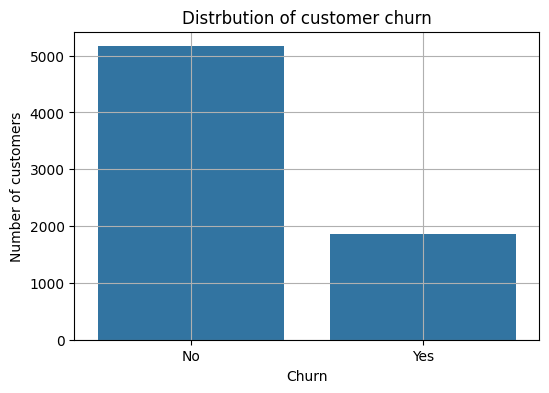

In [113]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Distrbution of customer churn')
plt.xlabel('Churn')
plt.ylabel('Number of customers')

plt.grid()
plt.show()

### Univariate Analysis
#### Numeric columns
##### 1. *Tenure* column

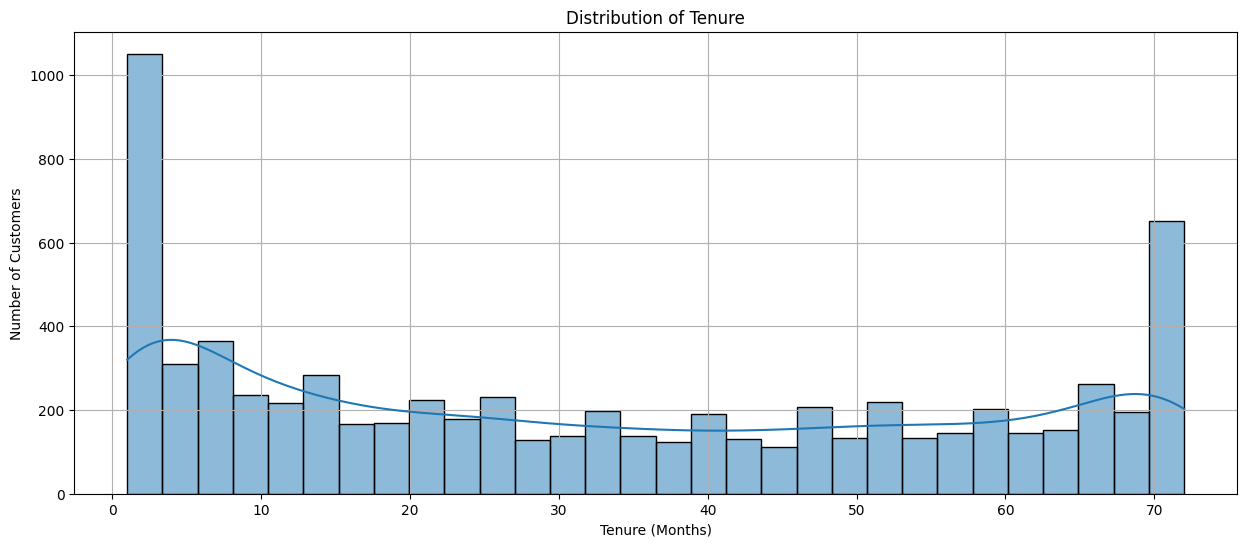

In [114]:
plt.figure(figsize=(15,6))
sns.histplot(df['tenure'], bins=30, kde=True)
plt.title("Distribution of Tenure")
plt.xlabel('Tenure (Months)')
plt.ylabel('Number of Customers')
plt.grid()
plt.show()


#### Interpretation

The tenure distribution shows a high concentration of customers in the early months (0–5 months).                                                                                              
Another noticeable peak appears near the maximum tenure (around 72 months), indicating long-term loyal customers.                                                                                              
The middle tenure range is relatively evenly distributed with fewer extreme concentrations.                                                                                            
This pattern suggests that customers may either churn early or remain loyal for a long time.                                                                                               

##### 3. *TotalCharges* Column

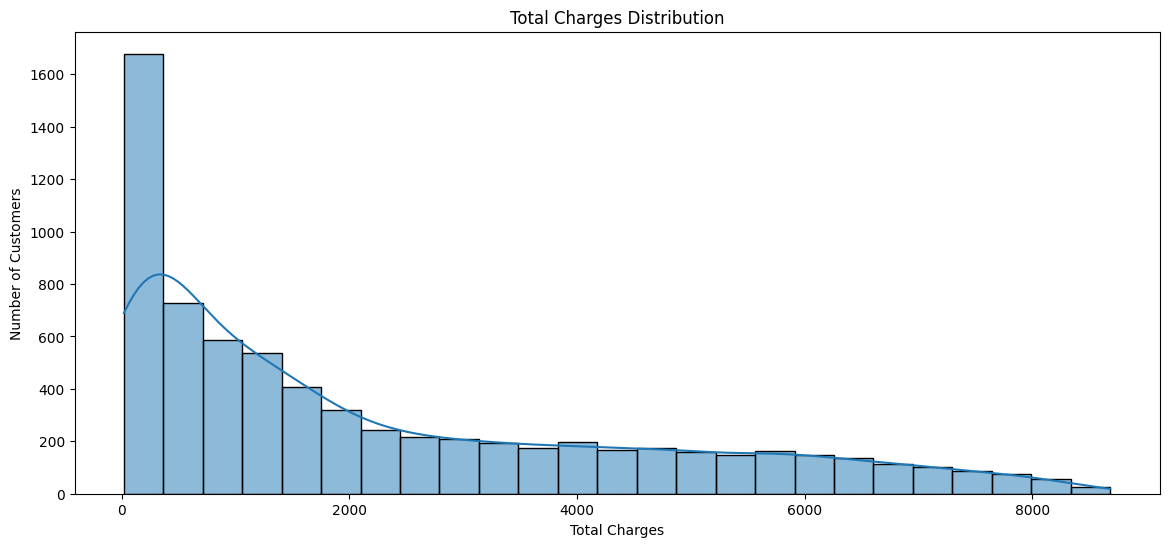

In [115]:
plt.figure(figsize=(14, 6))
sns.histplot(df['TotalCharges'], kde=True)
plt.title('Total Charges Distribution')
plt.xlabel('Total Charges')
plt.ylabel('Number of Customers')
plt.show()

##### Interpretation

The TotalCharges distribution is heavily right-skewed.                                                                                                                                  
A large number of customers have relatively low total charges.                                                                                                                                  
A smaller group of long-term customers accumulate very high total charges.                                                                                                                                  
The long right tail suggests the presence of high-value customers with long tenure.

#### Categorical columns
##### *Contract* column

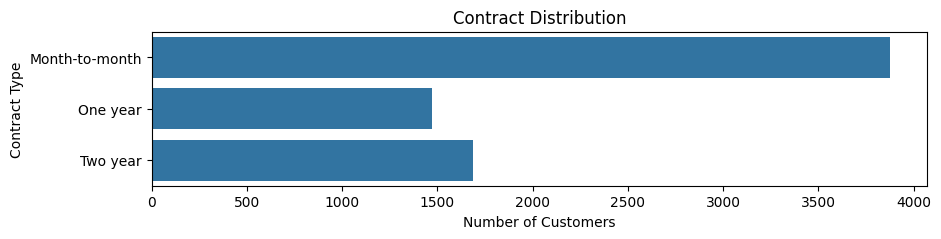

In [116]:
plt.figure(figsize=(10,2))
sns.countplot(y='Contract', data=df)
plt.title("Contract Distribution")
plt.xlabel("Number of Customers")
plt.ylabel("Contract Type")
plt.show()

##### Interpretation

The majority of customers are subscribed to month-to-month contracts.                                                                                                                   
One-year and two-year contracts represent a smaller proportion of the customer base.                                                                                                        
A high proportion of month-to-month contracts may increase churn risk due to lack of long-term commitment.

##### *InternetService* column

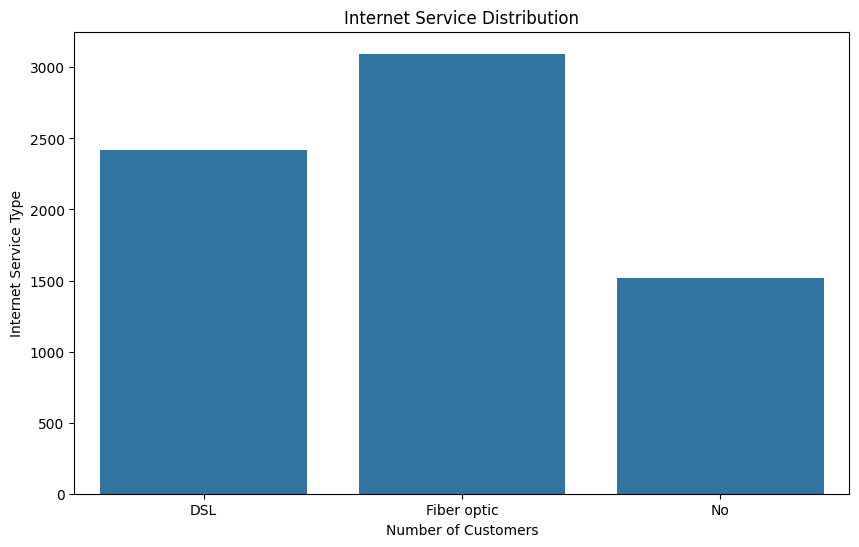

In [117]:
plt.figure(figsize=(10,6))
sns.countplot(x='InternetService', data=df)
plt.title("Internet Service Distribution")
plt.xlabel("Number of Customers")
plt.ylabel("Internet Service Type")
plt.show()


##### Interpretation

The majority of customers subscribe to Fiber optic internet service.                                                                                                                            
DSL represents a significant portion of the customer base.                                                                                                                          
A smaller segment of customers does not use internet services.                                                                                                                          
The dominance of Fiber optic suggests strong adoption of high-speed services, which may impact pricing and churn behavior.

### Bivariate Analysis
#### *Tenure* & *Churn*

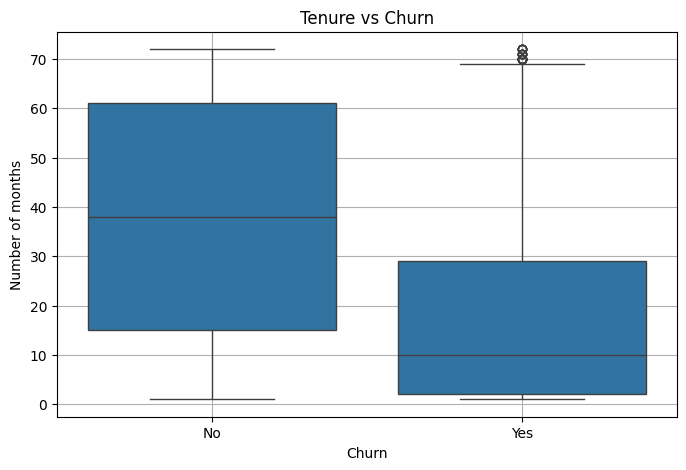

In [118]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure vs Churn')
plt.xlabel('Churn')
plt.ylabel('Number of months')
plt.grid()
plt.show()

##### Interpretation
- Customers, who churn, have significantly lower tenure compared to those who stayed
- The median tenure for churned customers is around 10 months, whereas non-churned customers show a median tenure above 35 months
- This indicates that ealy-stage customers are higer risk of churning 
- Customers retentionn efforst should be focused on the first year of subscription

#### *Contract* vs *Churn* 
what % of each contract type churned

In [119]:
pd.crosstab(df['Contract'], df['Churn'], normalize='index')*100

Churn,No,Yes
Contract,,
Month-to-month,57.290323,42.709677
One year,88.722826,11.277174
Two year,97.151335,2.848665


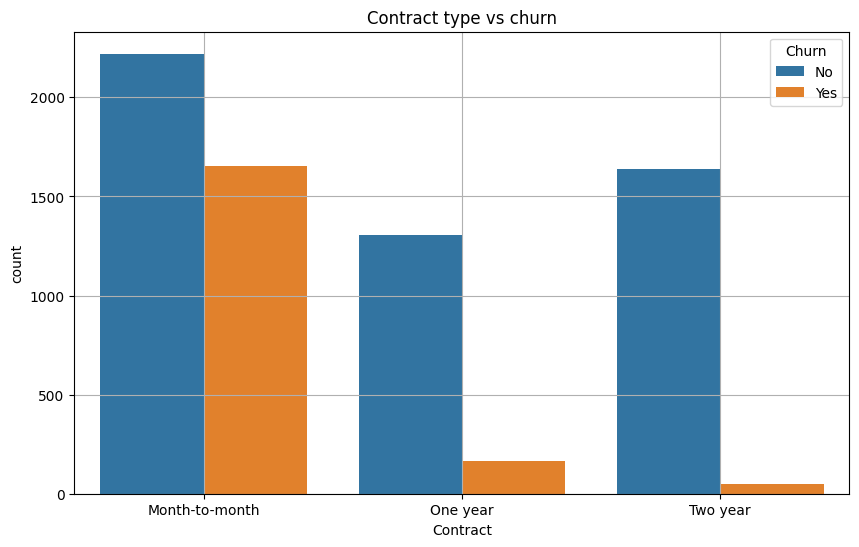

In [120]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Contract type vs churn')
plt.grid()
plt.show()

##### Intrepretation
- Contract type shows strong relationship with churn
- Approximately 43% of month-to-month customers churn
- In contrast, only 11% of one-year contract customers and 3% of two-year customers churn
- This indicates that long-term contracts significantly reduce churn risk

### Correlation Analysis (Numerical Features)

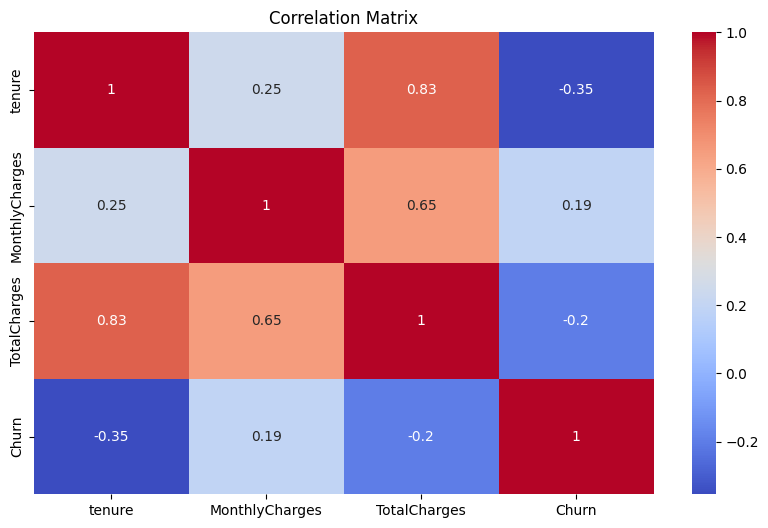

In [121]:
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})
corr_matrix = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

##### Interpretation
- Tenure has a moderate negative correlation with churn (-0.35). Customers who churn tend to have shorter tenure, while long-tenure customers are more likely to stay.
- MonthlyCharges has a weak positive correlation with churn (0.19), suggesting that higher monthly fees slightly increase churn risk.
- TotalCharges shows moderate negative correlation with churn (-0.20), likely driven by its strong relationship with tenure (0.83).
- Strong multicollinearity is observed between tenure and TotalCharges.

### Feature Relationship Analysis
#### Tenure × Contract vs Churn

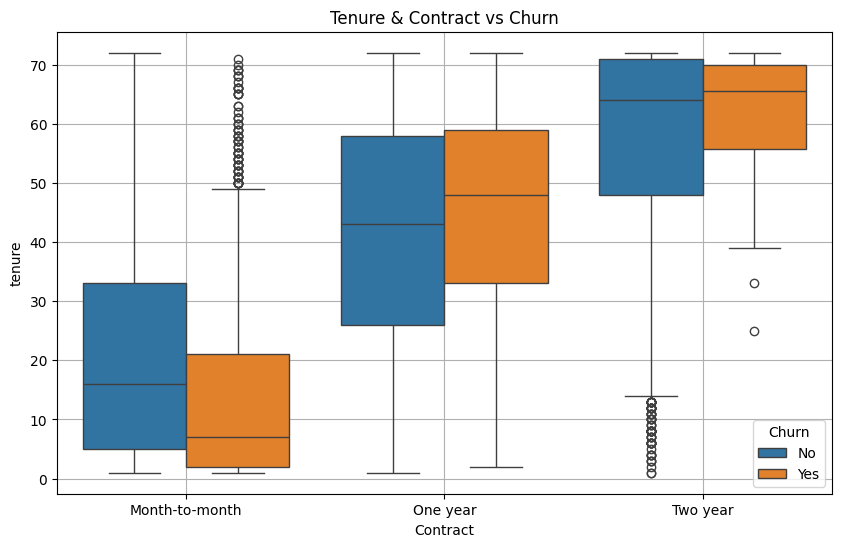

In [130]:
df['Churn'] = df['Churn'].map({0:'No', 1:'Yes'})

plt.figure(figsize=(10, 6))
sns.boxplot(x='Contract', y='tenure', hue='Churn', data=df)
plt.title("Tenure & Contract vs Churn")
plt.grid()
plt.show()

##### Interpretation
- Short-tenure customers on month-to-month contracts exhibit the highest churn risk
- Long-term contracts significantly reduce churn probability regardless of tenure
- Two-year contract customers demonstrate strong stability even in early tenure stages
- This suggests that both contract type and tenure interact to influence churn behavior

### Key Insights
- Contract type is the strongest categorical predictor of churn. Month-to-month customers exhibit significantly higher churn rates compared to long-term contract customers.
- Tenure is the strongest numerical predictor of churn. Customers in their first year are substantially more likely to churn.
- Monthly charges show a weak positive relationship with churn, suggesting that higher pricing slightly increases churn risk.
- Fiber optic customers demonstrate higher churn rates, potentially due to higher expectations or pricing.
- The highest-risk customer segment consists of short-tenure customers on month-to-month contracts.

### Business Recommendations
- Focus on reducing early-stage churn by strengthening onboarding and engagement strategies within the first 12 months.
- Encourage migration from month-to-month contracts to long-term contracts through financial incentives and loyalty programs.
- Monitor high-paying customers closely and provide value-driven retention strategies to reduce price sensitivity.
- Conduct service quality assessment for fiber optic customers and improve support mechanisms.